# Setup

In [ ]:
!pip install umap-learn

In [ ]:
import pickle
import numpy as np

import umap
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load feature activations for multiple L b+a steering

In [ ]:
file_path = '/content/drive/MyDrive/unst_feature_acts.pkl'
with open(file_path, 'rb') as f:
    unst_feature_acts = pickle.load(f)

file_path = '/content/drive/MyDrive/steered_feature_acts.pkl'
with open(file_path, 'rb') as f:
    steered_feature_acts = pickle.load(f)

# umap feature actvs before + after steering

## L6

In [ ]:
layer_id = 6
oneLayer_unst_feature_acts = unst_feature_acts[f'blocks.{layer_id}.hook_resid_pre']
oneLayer_steered_feature_acts = steered_feature_acts[f'blocks.{layer_id}.hook_resid_pre']

# Optionally, check the shape of the loaded weight matrix
print(oneLayer_unst_feature_acts.shape)

torch.Size([32, 128, 24576])


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


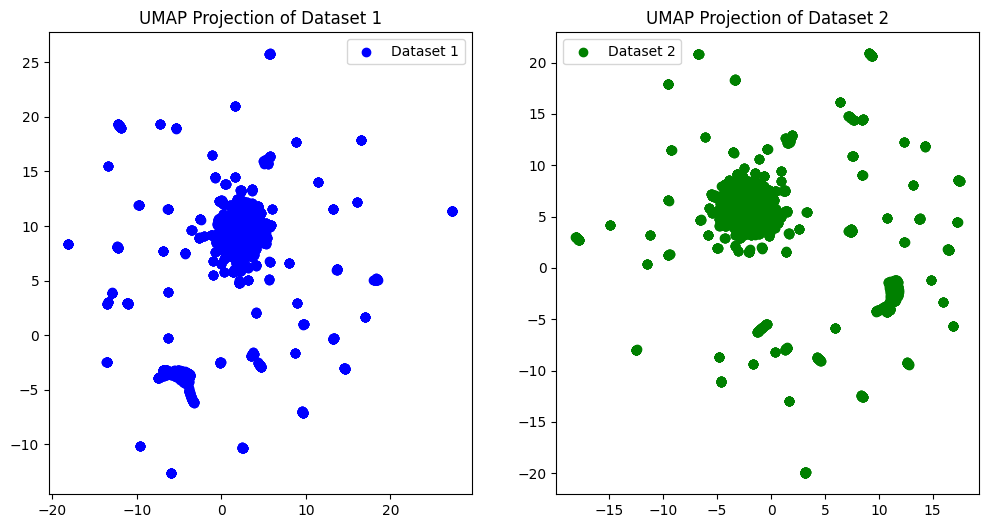

In [ ]:
reshaped_activations_A = oneLayer_unst_feature_acts.reshape(32 * 128, 24576).cpu()
reshaped_activations_B = oneLayer_steered_feature_acts.reshape(32 * 128, 24576).cpu()

reducer = umap.UMAP()
embedding1 = reducer.fit_transform(reshaped_activations_A)
embedding2 = reducer.fit_transform(reshaped_activations_B)

# Create Side-by-Side Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the first dataset
axes[0].scatter(embedding1[:, 0], embedding1[:, 1], c='blue', label='Dataset 1')
axes[0].set_title('UMAP Projection of Dataset 1')
axes[0].legend()

# Plot for the second dataset
axes[1].scatter(embedding2[:, 0], embedding2[:, 1], c='green', label='Dataset 2')
axes[1].set_title('UMAP Projection of Dataset 2')
axes[1].legend()

plt.show()

## Layers 7 to 11

In [ ]:
# for layer_id in range(7, 10):
#     oneLayer_unst_feature_acts = unst_feature_acts[f'blocks.{layer_id}.hook_resid_pre']
#     oneLayer_steered_feature_acts = steered_feature_acts[f'blocks.{layer_id}.hook_resid_pre']

#     reshaped_activations_A = oneLayer_unst_feature_acts.reshape(32 * 128, 24576).cpu()
#     reshaped_activations_B = oneLayer_steered_feature_acts.reshape(32 * 128, 24576).cpu()

#     reducer = umap.UMAP()
#     embedding1 = reducer.fit_transform(reshaped_activations_A)
#     embedding2 = reducer.fit_transform(reshaped_activations_B)

#     # Create Side-by-Side Plots
#     fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#     # Plot for the first dataset
#     axes[0].scatter(embedding1[:, 0], embedding1[:, 1], c='blue', label='Dataset 1')
#     axes[0].set_title('UMAP Projection of Dataset 1')
#     axes[0].legend()

#     # Plot for the second dataset
#     axes[1].scatter(embedding2[:, 0], embedding2[:, 1], c='green', label='Dataset 2')
#     axes[1].set_title('UMAP Projection of Dataset 2')
#     axes[1].legend()

#     plt.show()

torch.Size([32, 128, 24576])


# cca

## L6

In [ ]:
layer_id = 6
oneLayer_unst_feature_acts = unst_feature_acts[f'blocks.{layer_id}.hook_resid_pre']
oneLayer_steered_feature_acts = steered_feature_acts[f'blocks.{layer_id}.hook_resid_pre']

# Optionally, check the shape of the loaded weight matrix
print(oneLayer_unst_feature_acts.shape)

torch.Size([32, 128, 24576])


In [ ]:
from sklearn.cross_decomposition import CCA

reshaped_activations_A = oneLayer_unst_feature_acts.reshape(32 * 128, 24576).cpu()
reshaped_activations_B = oneLayer_steered_feature_acts.reshape(32 * 128, 24576).cpu()

reducer = umap.UMAP()
embedding1 = reducer.fit_transform(reshaped_activations_A)
embedding2 = reducer.fit_transform(reshaped_activations_B)

# Initialize CCA
cca = CCA(n_components=2)  # has to be 2 due to UMAP

# Fit the model; this is too slow, so use it on UMAP data
# cca.fit(reshaped_activations_A, reshaped_activations_B)
cca.fit(embedding1, embedding2)

# Transform the data
A_c, B_c = cca.transform(embedding1, embedding2)

# A_c and B_c are the transformed data in the canonical space
print("Canonical Correlations:")
print(cca.score(embedding1, embedding2))

# Optional: To see the correlation coefficients
corrs = [np.corrcoef(A_c[:, i], B_c[:, i])[0, 1] for i in range(A_c.shape[1])]
print("Correlation Coefficients:", corrs)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Canonical Correlations:
-0.23755626716455025
Correlation Coefficients: [0.49006658992455354, 0.26686220794459087]


## Layers 7 to 11

7


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Canonical Correlations:
-0.5521219919480923
Correlation Coefficients: [0.4190474161395364, 0.02261177570656566]


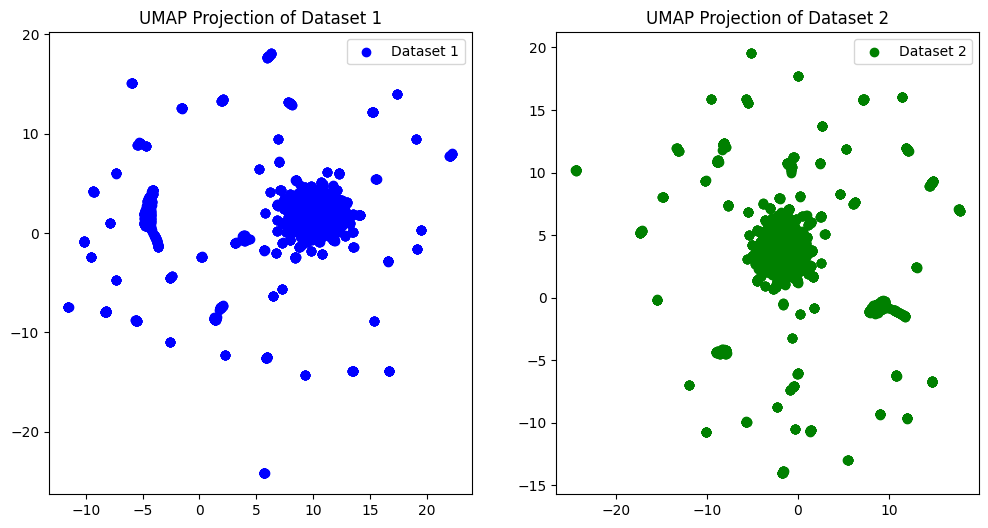

8


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Canonical Correlations:
-0.1671034338847487
Correlation Coefficients: [0.6871504028408416, 0.0838481323104947]


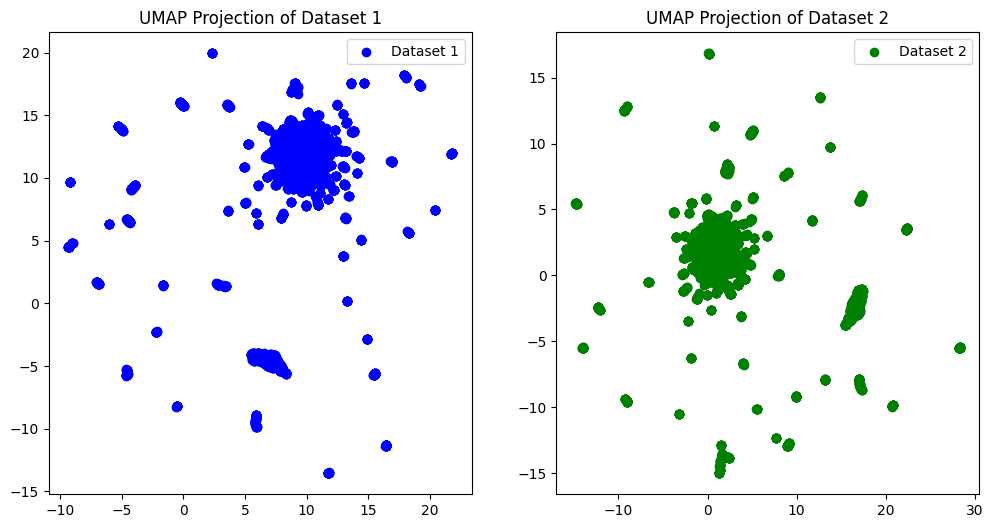

9


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Canonical Correlations:
-0.19916363835505202
Correlation Coefficients: [0.5522839885968833, 0.11482671672427146]


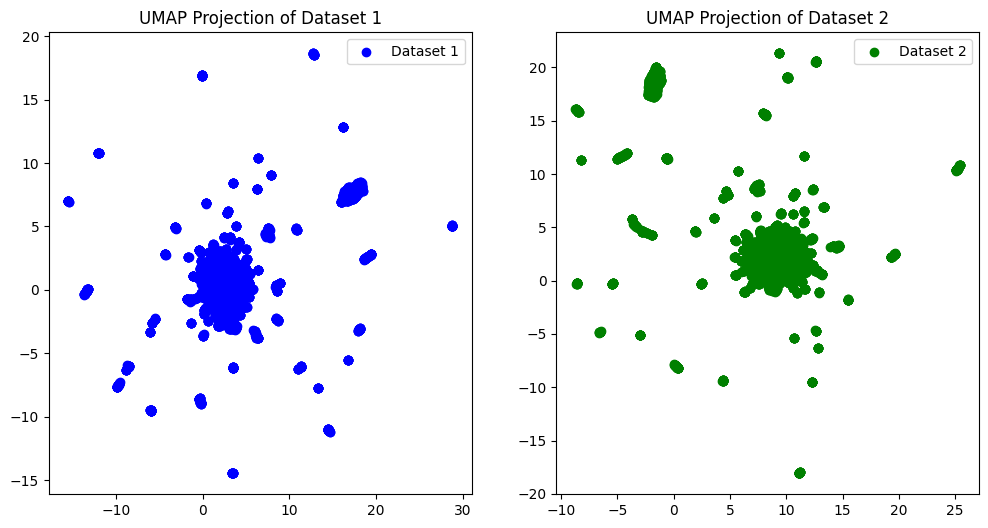

In [ ]:
for layer_id in range(7, 10):
    print(layer_id)
    oneLayer_unst_feature_acts = unst_feature_acts[f'blocks.{layer_id}.hook_resid_pre']
    oneLayer_steered_feature_acts = steered_feature_acts[f'blocks.{layer_id}.hook_resid_pre']

    reshaped_activations_A = oneLayer_unst_feature_acts.reshape(32 * 128, 24576).cpu()
    reshaped_activations_B = oneLayer_steered_feature_acts.reshape(32 * 128, 24576).cpu()

    reducer = umap.UMAP()
    embedding1 = reducer.fit_transform(reshaped_activations_A)
    embedding2 = reducer.fit_transform(reshaped_activations_B)

    cca = CCA(n_components=2)
    cca.fit(embedding1, embedding2) # Fit the model after UMAP

    # Transform the data
    A_c, B_c = cca.transform(embedding1, embedding2)

    # A_c and B_c are the transformed data in the canonical space
    print("Canonical Correlations:")
    print(cca.score(embedding1, embedding2))

    # Optional: To see the correlation coefficients
    corrs = [np.corrcoef(A_c[:, i], B_c[:, i])[0, 1] for i in range(A_c.shape[1])]
    print("Correlation Coefficients:", corrs)

    # Create Side-by-Side Plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for the first dataset
    axes[0].scatter(embedding1[:, 0], embedding1[:, 1], c='blue', label='Dataset 1')
    axes[0].set_title('UMAP Projection of Dataset 1')
    axes[0].legend()

    # Plot for the second dataset
    axes[1].scatter(embedding2[:, 0], embedding2[:, 1], c='green', label='Dataset 2')
    axes[1].set_title('UMAP Projection of Dataset 2')
    axes[1].legend()

    plt.show()

# Change UMAP params

In [ ]:
from sklearn.cross_decomposition import CCA

In [ ]:
for layer_id in range(6, 10):
    print(layer_id)
    oneLayer_unst_feature_acts = unst_feature_acts[f'blocks.{layer_id}.hook_resid_pre']
    oneLayer_steered_feature_acts = steered_feature_acts[f'blocks.{layer_id}.hook_resid_pre']

    reshaped_activations_A = oneLayer_unst_feature_acts.reshape(32 * 128, 24576).cpu()
    reshaped_activations_B = oneLayer_steered_feature_acts.reshape(32 * 128, 24576).cpu()

    reducer = umap.UMAP(n_components=5, random_state=42)  # Use a smaller number of components for CCA
    embedding1 = reducer.fit_transform(reshaped_activations_A)
    embedding2 = reducer.fit_transform(reshaped_activations_B)

    cca = CCA(n_components=2)
    cca.fit(embedding1, embedding2) # Fit the model after UMAP

    # Transform the data using CCA
    cca_embedding1, cca_embedding2 = cca.transform(embedding1, embedding2)

    # Optional: To see the correlation coefficients
    corrs = [np.corrcoef(cca_embedding1[:, i], cca_embedding2[:, i])[0, 1] for i in range(cca_embedding1.shape[1])]
    print("Canonical Correlation Coefficients:", corrs)

    # Plot the first two canonical variables
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(cca_embedding1[:, 0], cca_embedding1[:, 1], c='blue', label='UMAP Dataset 1')
    plt.title('Canonical Variables of UMAP Dataset 1')
    plt.xlabel('Canonical Variable 1')
    plt.ylabel('Canonical Variable 2')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(cca_embedding2[:, 0], cca_embedding2[:, 1], c='green', label='UMAP Dataset 2')
    plt.title('Canonical Variables of UMAP Dataset 2')
    plt.xlabel('Canonical Variable 1')
    plt.ylabel('Canonical Variable 2')
    plt.legend()

    plt.show()

6


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
